Datos tomado de: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

Importar librerias

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import     accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

Definir ruta de los datos

In [2]:
path_data = './datos/loan_data.csv'

## 1. Cargar un conjunto de datos CSV con una variable objetivo binaria y mostrar las primeras 5 filas.

In [3]:
df = pd.read_csv(path_data)
df.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## 2. Crear un gráfico de dispersión para visualizar la relación entre dos variables predictoras.

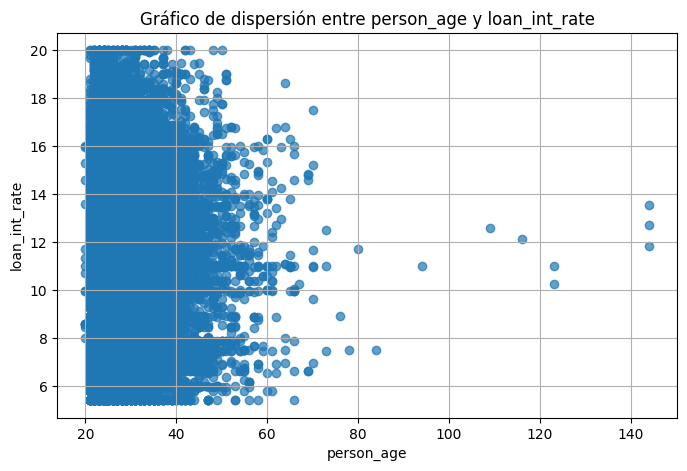

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(df['person_age'], df['loan_int_rate'], alpha=0.7)
plt.xlabel('person_age')
plt.ylabel('loan_int_rate')
plt.title('Gráfico de dispersión entre person_age y loan_int_rate')
plt.grid(True)
plt.show()


## 3. Dividir los datos en conjuntos de entrenamiento y prueba (80/20).

In [8]:
#Definir matriz X solo columnas numéricas
X = df.select_dtypes(include=[np.number])
Y= df['loan_status']
#Dividir el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


## 4. Entrenar un modelo de regresión logística con scikit-learn.

In [10]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 5. Predecir con el modelo y mostrar los valores predichos.

In [11]:
y_pred = model_lr.predict(X_test)

y_pred[0:10]

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0])

## 6. Calcular la exactitud (accuracy) del modelo.

In [12]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

## 7. Calcular y mostrar la matriz de confusión.

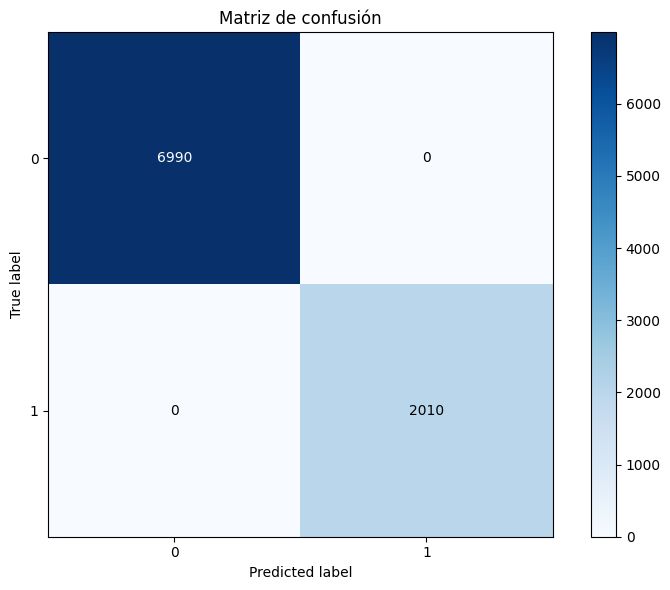

In [16]:
cm_2 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm_2, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de confusión')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

thresh = cm_2.max() / 2.
for i in range(cm_2.shape[0]):
    for j in range(cm_2.shape[1]):
        plt.text(j, i, format(cm_2[i, j], 'd'),
                 ha='center', va='center',
                 color='white' if cm_2[i, j] > thresh else 'black')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()



## 8. Graficar la matriz de confusión con seaborn.

Text(0.5, 36.72222222222221, 'Predicted')

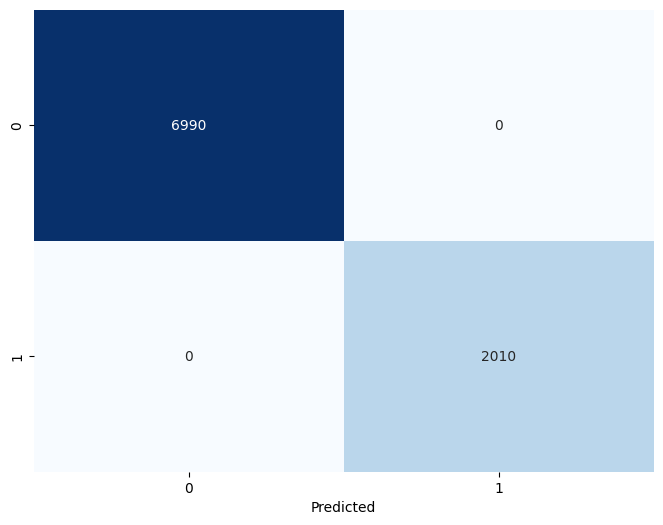

In [17]:
# calcular matriz de confusión y graficar
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')

## 9. Calcular precisión, recall y F1-score del modelo.

In [18]:
presicion = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {presicion}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## 10. Mostrar la curva ROC y calcular el área bajo la curva (AUC).

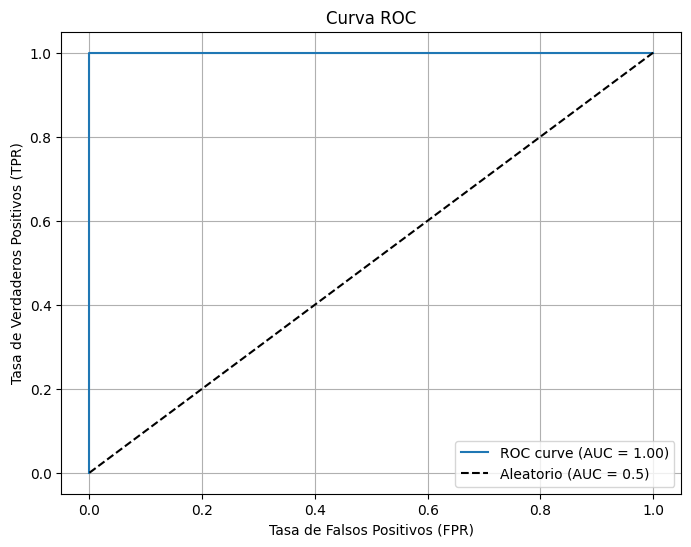

In [19]:
y_proba = model_lr.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## 11. Entrenar un modelo con solo una de las variables independientes y comparar resultados.

In [20]:
# Seleccionar una sola columna independeinte
X_1 = df[['person_age']]
# Dividir el dataset en train y test
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, Y, test_size=0.2, random_state=42)
#entrenar el modelo
model_lr_1 = LogisticRegression(max_iter=1000)
model_lr_1.fit(X_train_1, y_train_1)
# predecir
y_pred_1 = model_lr_1.predict(X_test_1)
print(y_pred_1[0:10])
# calcular acuracy, precision, recall y f1
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
presicion_1 = precision_score(y_test_1, y_pred_1)
recall_1 = recall_score(y_test_1, y_pred_1)
f1_1 = f1_score(y_test_1, y_pred_1)
print(f'Accuracy: {accuracy_1}')
print(f'Precision: {presicion_1}')
print(f'Recall: {recall_1}')
print(f'F1 Score: {f1_1}')


[0 0 0 0 0 0 0 0 0 0]
Accuracy: 0.7766666666666666
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


d:\Capasitaciones\Diplomado en nuevas tecnologias\Practicas\ML-1\_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Entrenar con una sola variable independiente no genera un buen modelo a comparación del anterior, ya que las métricas indican cero en su mayoría.**

## 12. Normalizar los datos y repetir el entrenamiento.

In [22]:
# entrenar el modelo con datos estandarizados y normalziados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_lr_scaled = LogisticRegression(max_iter=1000)
model_lr_scaled.fit(X_train_scaled, y_train)
# predecir
y_pred_scaled = model_lr_scaled.predict(X_test_scaled)
# calcular acuracy, precision, recall y f1
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
presicion_scaled = precision_score(y_test, y_pred_scaled)
recall_scaled = recall_score(y_test, y_pred_scaled)
f1_scaled = f1_score(y_test, y_pred_scaled)
print(f'Accuracy: {accuracy_scaled}')
print(f'Precision: {presicion_scaled}')
print(f'Recall: {recall_scaled}')
print(f'F1 Score: {f1_scaled}')


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**Se obtiene un modelo similar al primero para este caso después de normalizar los datos.**

## 13. Probar cómo afecta el desequilibrio de clases al modelo.

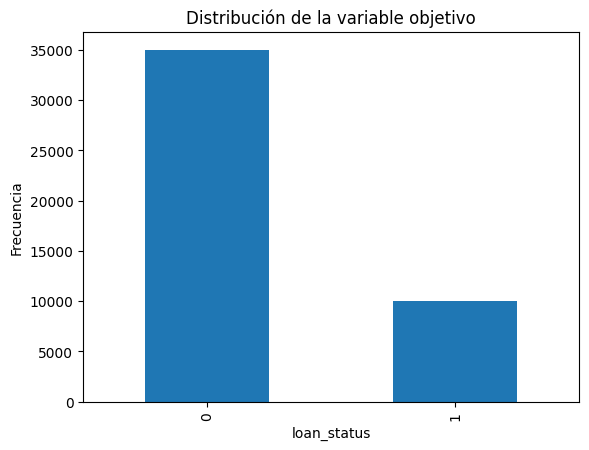

In [23]:
# hasta ahora se ha operado con datos de la variable objetivo loan_status veamos su distribución
df['loan_status'].value_counts().plot(kind='bar')
plt.title('Distribución de la variable objetivo')
plt.xlabel('loan_status')
plt.ylabel('Frecuencia')
plt.show()

**A pesar de esto los resultados son óptimos de igual forma se entrenará haciendo un balanceo simple de datos.**

In [24]:
# optener dataframe con loan_status balanceada
count_minority_class = df['loan_status'].value_counts().min()
count_minority_class


np.int64(10000)

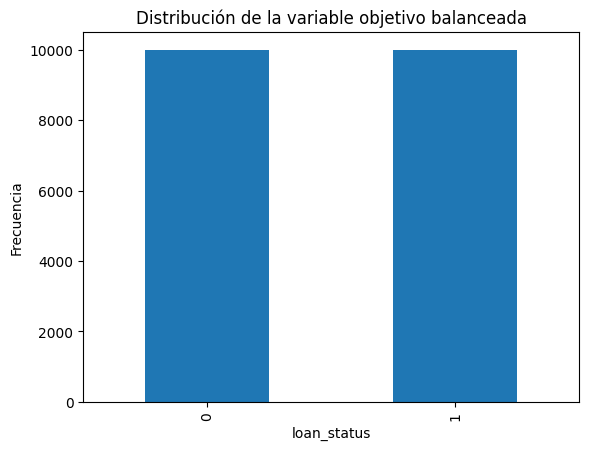

In [26]:
# generar dataframe con loan_status balanceada
df_0 = df[df['loan_status'] == 0]
df_1 = df[df['loan_status'] == 1]

#elegir aleatroeamente la cantidad de filas de la clase mayoritaria es deecir clase 0
df_0_b = df_0.sample(count_minority_class, random_state=42)
df_balanced = pd.concat([df_0_b, df_1], axis=0)
df_balanced['loan_status'].value_counts().plot(kind='bar')
plt.title('Distribución de la variable objetivo balanceada')
plt.xlabel('loan_status')
plt.ylabel('Frecuencia')
plt.show()


In [27]:
#entrenar con datos balanceados
X_balanced = df_balanced.select_dtypes(include=[np.number])
Y_balanced = df_balanced['loan_status']
#Dividir el dataset en train y test
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, Y_balanced, test_size=0.2, random_state=42)
#entrenar el modelo
model_lr_balanced = LogisticRegression(max_iter=1000)
model_lr_balanced.fit(X_train_balanced, y_train_balanced)
# predecir
y_pred_balanced = model_lr_balanced.predict(X_test_balanced)
# calcular acuracy, precision, recall y f1
accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
presicion_balanced = precision_score(y_test_balanced, y_pred_balanced)
recall_balanced = recall_score(y_test_balanced, y_pred_balanced)
f1_balanced = f1_score(y_test_balanced, y_pred_balanced)
print(f'Accuracy: {accuracy_balanced}')
print(f'Precision: {presicion_balanced}')
print(f'Recall: {recall_balanced}')
print(f'F1 Score: {f1_balanced}')


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**Se puede evidenciar que el balanceo de datos de igual forma genera un modelo de regresión logística de igual eficiencia que el primero.**

## 14. Aplicar regresión logística a un conjunto de datos real de sklearn (por ejemplo, Breast Cancer).

Esto esta en el documento llamado 14-regresion_logistica_breast_cancer.py

## 15. Guardar el modelo entrenado en disco con joblib y luego cargarlo para hacer predicciones.

In [28]:
# podemos guardar todos los modelos entrenados
joblib.dump(model_lr, './modelos/model_lr_simple.pkl')
joblib.dump(model_lr_1, './modelos/model_lr_1_variable_x.pkl')
joblib.dump(model_lr_scaled, './modelos/model_lr_scaled.pkl')
joblib.dump(model_lr_balanced, './modelos/model_lr_balanced.pkl')

['./modelos/model_lr_balanced.pkl']

In [30]:
# cargamos cualqueir modelos y hacemos prediciones
model_lr_loaded = joblib.load('./modelos/model_lr_simple.pkl')
y_pred_loaded = model_lr_loaded.predict(X_test[0:10])

print("Predicciones: ",y_pred_loaded)
print("Valores reales: ",y_test[0:10].values)

Predicciones:  [0 0 1 0 1 0 0 1 1 0]
Valores reales:  [0 0 1 0 1 0 0 1 1 0]
